# Minimal example for working with NGIMU data

Import the worklab module

In [1]:
import os
import worklab as wl

Import the data with `com.load()`:

In [2]:
filename = os.getcwd()
filename = os.path.join(os.path.split(filename)[0], 'examples', 'example_data', 'imu_example_data')
imu_data = wl.com.load_imu(filename, filenames=["sensors"])
print("NGIMU data is stored in a: ", type(imu_data))

NGIMU data is stored in a:  <class 'dict'>


The structure is as follows: you have a dictionary with all devices, that contains a dictionary with all sensors. Sensordata is stored in Pandas DataFrames:

In [3]:
print("Imu_data contains: ", imu_data.keys())  # dict
print("Frame contains: ", imu_data["frame"].keys())  # dict
print("sensors contains: ", imu_data["frame"]["sensors"].columns)  # DataFrame

Imu_data contains:  dict_keys(['right', 'left', 'frame'])
Frame contains:  dict_keys(['sensors'])
sensors contains:  Index(['time', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'accelerometer_x',
       'accelerometer_y', 'accelerometer_z', 'magnetometer_x',
       'magnetometer_y', 'magnetometer_z', 'barometer'],
      dtype='object')


You can resample the IMUs to a fixed frequency with `imu.resample_imu()` which takes a session data object and a sample frequency:

In [4]:
print("Freq before resampling: ", 1 / imu_data["frame"]["sensors"]["time"].diff().mean())
imu_data = wl.imu.resample_imu(imu_data, sfreq=400)
print("Freq after resampling: ", 1 / imu_data["frame"]["sensors"]["time"].diff().mean())

Freq before resampling:  397.0700650101465
Freq after resampling:  400.0


If you have the IMUs attached to a wheelchair you can use `imu.process_imu()` to get wheelchair performance related variables (the function needs some wheelchair specific information):

In [5]:
imu_data = wl.imu.process_imu(imu_data)

If you use the data structure for wheelchair related variables the different sensor keys get dropped and just the relevant DataFrames are kept.
You can visualize the data using Pandas built-in plot function or with matplotlib:

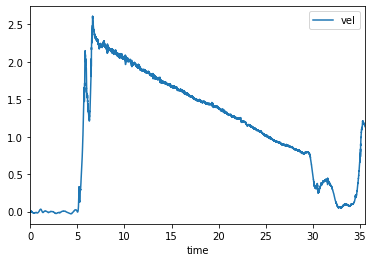

In [6]:
imu_data["frame"].plot("time", "vel");

There you go! You can consider some filtering now and extracting the variables you need.